# PREDICTION OF GENRE

## Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Reading The Data

In [2]:
df = pd.read_csv('tmdb_5000_movies.csv')
df.drop(['homepage','tagline','overview'],axis=1,inplace=True)  #Dropped the columns which are unnecessary.

In [3]:
df.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


## Checking Null Values

In [4]:
df.isnull().sum()

budget                  0
genres                  0
id                      0
keywords                0
original_language       0
original_title          0
popularity              0
production_companies    0
production_countries    0
release_date            1
revenue                 0
runtime                 2
spoken_languages        0
status                  0
title                   0
vote_average            0
vote_count              0
dtype: int64

## Checking Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 17 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null int64
dtypes: float64(3), int64(4), object(10)
memory usage: 638.0+ KB


## Converting Float Type to Int Type

In [6]:
df['popularity']=df['popularity'].astype('int64')

## Release Date Splitting

In [7]:
data_a = df['release_date'].str.split('-',0,expand=True)
df['release_date'] = data_a[0]

## Genres Splitting

In [8]:
df['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

In [9]:
data_b = df['genres'].str.split(':',2,expand=True)
data_b

,0,1,2
0,"[{""id""","28, ""name""","""Action""}, {""id"": 12, ""name"": ""Adventure""}, {..."
1,"[{""id""","12, ""name""","""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, ..."
2,"[{""id""","28, ""name""","""Action""}, {""id"": 12, ""name"": ""Adventure""}, {..."
3,"[{""id""","28, ""name""","""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id""..."
4,"[{""id""","28, ""name""","""Action""}, {""id"": 12, ""name"": ""Adventure""}, {..."
...,...,...,...
4798,"[{""id""","28, ""name""","""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id""..."
4799,"[{""id""","35, ""name""","""Comedy""}, {""id"": 10749, ""name"": ""Romance""}]"
4800,"[{""id""","35, ""name""","""Comedy""}, {""id"": 18, ""name"": ""Drama""}, {""id""..."
4801,[],None,None


In [10]:
data_c = data_b[2].str.split('}',1,expand=True)
data_c

,0,1
0,"""Action""",", {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ..."
1,"""Adventure""",", {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""n..."
2,"""Action""",", {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ..."
3,"""Action""",", {""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""nam..."
4,"""Action""",", {""id"": 12, ""name"": ""Adventure""}, {""id"": 878,..."
...,...,...
4798,"""Action""",", {""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""nam..."
4799,"""Comedy""",", {""id"": 10749, ""name"": ""Romance""}]"
4800,"""Comedy""",", {""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""..."
4801,None,None


In [11]:
data_d = data_c[0].str.split('"',1,expand=True)
data_d

,0,1
0,,"Action"""
1,,"Adventure"""
2,,"Action"""
3,,"Action"""
4,,"Action"""
...,...,...
4798,,"Action"""
4799,,"Comedy"""
4800,,"Comedy"""
4801,None,None


In [12]:
data_f = data_d[1].str.split('"',0,expand=True)
data_f

,0,1
0,Action,
1,Adventure,
2,Action,
3,Action,
4,Action,
...,...,...
4798,Action,
4799,Comedy,
4800,Comedy,
4801,None,None


In [13]:
data_f[0].value_counts()

Drama              1207
Comedy             1042
Action              754
Adventure           339
Horror              300
Crime               195
Thriller            194
Animation           123
Fantasy             117
Romance             106
Science Fiction      96
Documentary          89
Family               56
Mystery              41
Music                34
Western              27
History              25
War                  24
TV Movie              4
Foreign               2
Name: 0, dtype: int64

In [14]:
df['genres'] = data_f[0]

In [15]:
df.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,Action,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,150,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,Adventure,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,139,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,107,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,Action,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,112,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,Action,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,43,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


## Keywords Splitting

In [16]:
df['keywords']

0       [{"id": 1463, "name": "culture clash"}, {"id":...
1       [{"id": 270, "name": "ocean"}, {"id": 726, "na...
2       [{"id": 470, "name": "spy"}, {"id": 818, "name...
3       [{"id": 849, "name": "dc comics"}, {"id": 853,...
4       [{"id": 818, "name": "based on novel"}, {"id":...
                              ...                        
4798    [{"id": 5616, "name": "united states\u2013mexi...
4799                                                   []
4800    [{"id": 248, "name": "date"}, {"id": 699, "nam...
4801                                                   []
4802    [{"id": 1523, "name": "obsession"}, {"id": 224...
Name: keywords, Length: 4803, dtype: object

In [17]:
data_g = df['keywords'].str.split(':',2,expand=True)
data_g

,0,1,2
0,"[{""id""","1463, ""name""","""culture clash""}, {""id"": 2964, ""name"": ""futur..."
1,"[{""id""","270, ""name""","""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, ..."
2,"[{""id""","470, ""name""","""spy""}, {""id"": 818, ""name"": ""based on novel""}..."
3,"[{""id""","849, ""name""","""dc comics""}, {""id"": 853, ""name"": ""crime figh..."
4,"[{""id""","818, ""name""","""based on novel""}, {""id"": 839, ""name"": ""mars""..."
...,...,...,...
4798,"[{""id""","5616, ""name""","""united states\u2013mexico barrier""}, {""id"": ..."
4799,[],None,None
4800,"[{""id""","248, ""name""","""date""}, {""id"": 699, ""name"": ""love at first s..."
4801,[],None,None


In [18]:
data_h = data_g[2].str.split('}',1,expand=True)
data_h

,0,1
0,"""culture clash""",", {""id"": 2964, ""name"": ""future""}, {""id"": 3386,..."
1,"""ocean""",", {""id"": 726, ""name"": ""drug abuse""}, {""id"": 91..."
2,"""spy""",", {""id"": 818, ""name"": ""based on novel""}, {""id""..."
3,"""dc comics""",", {""id"": 853, ""name"": ""crime fighter""}, {""id"":..."
4,"""based on novel""",", {""id"": 839, ""name"": ""mars""}, {""id"": 1456, ""n..."
...,...,...
4798,"""united states\u2013mexico barrier""",", {""id"": 33649, ""name"": ""legs""}, {""id"": 162740..."
4799,None,None
4800,"""date""",", {""id"": 699, ""name"": ""love at first sight""}, ..."
4801,None,None


In [19]:
data_i = data_h[0].str.split('"',1,expand=True)
data_i

,0,1
0,,"culture clash"""
1,,"ocean"""
2,,"spy"""
3,,"dc comics"""
4,,"based on novel"""
...,...,...
4798,,"united states\u2013mexico barrier"""
4799,None,None
4800,,"date"""
4801,None,None


In [20]:
data_j = data_i[1].str.split('"',0,expand=True)
data_j

,0,1
0,culture clash,
1,ocean,
2,spy,
3,dc comics,
4,based on novel,
...,...,...
4798,united states\u2013mexico barrier,
4799,None,None
4800,date,
4801,None,None


In [21]:
data_j[0].value_counts()

based on novel      94
independent film    87
new york            73
london england      61
prison              60
                    ..
politician           1
child murderer       1
pedophilia           1
indonesia            1
running              1
Name: 0, Length: 1351, dtype: int64

In [22]:
df['keywords'] = data_j[0]

In [23]:
df['keywords'].mode()

0    based on novel
dtype: object

In [24]:
df.isnull().sum()

budget                    0
genres                   28
id                        0
keywords                412
original_language         0
original_title            0
popularity                0
production_companies      0
production_countries      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
status                    0
title                     0
vote_average              0
vote_count                0
dtype: int64

In [25]:
df.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,Action,19995,culture clash,en,Avatar,150,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,Adventure,285,ocean,en,Pirates of the Caribbean: At World's End,139,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,206647,spy,en,Spectre,107,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,Action,49026,dc comics,en,The Dark Knight Rises,112,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,Action,49529,based on novel,en,John Carter,43,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124


## Production Companies Splitting

In [26]:
df['production_companies'].value_counts()

[]                                                                                                                                                                          351
[{"name": "Paramount Pictures", "id": 4}]                                                                                                                                    58
[{"name": "Universal Pictures", "id": 33}]                                                                                                                                   45
[{"name": "New Line Cinema", "id": 12}]                                                                                                                                      38
[{"name": "Columbia Pictures", "id": 5}]                                                                                                                                     37
                                                                                                                        

In [27]:
data_k = df['production_companies'].str.split(':',1,expand=True)
data_k

,0,1
0,"[{""name""","""Ingenious Film Partners"", ""id"": 289}, {""name..."
1,"[{""name""","""Walt Disney Pictures"", ""id"": 2}, {""name"": ""J..."
2,"[{""name""","""Columbia Pictures"", ""id"": 5}, {""name"": ""Danj..."
3,"[{""name""","""Legendary Pictures"", ""id"": 923}, {""name"": ""W..."
4,"[{""name""","""Walt Disney Pictures"", ""id"": 2}]"
...,...,...
4798,"[{""name""","""Columbia Pictures"", ""id"": 5}]"
4799,[],None
4800,"[{""name""","""Front Street Pictures"", ""id"": 3958}, {""name""..."
4801,[],None


In [28]:
data_l = data_k[1].str.split('"',1,expand=True)
data_l

,0,1
0,,"Ingenious Film Partners"", ""id"": 289}, {""name"":..."
1,,"Walt Disney Pictures"", ""id"": 2}, {""name"": ""Jer..."
2,,"Columbia Pictures"", ""id"": 5}, {""name"": ""Danjaq..."
3,,"Legendary Pictures"", ""id"": 923}, {""name"": ""War..."
4,,"Walt Disney Pictures"", ""id"": 2}]"
...,...,...
4798,,"Columbia Pictures"", ""id"": 5}]"
4799,None,None
4800,,"Front Street Pictures"", ""id"": 3958}, {""name"": ..."
4801,None,None


In [29]:
data_m = data_l[1].str.split('"',1,expand=True)
data_m

,0,1
0,Ingenious Film Partners,", ""id"": 289}, {""name"": ""Twentieth Century Fox ..."
1,Walt Disney Pictures,", ""id"": 2}, {""name"": ""Jerry Bruckheimer Films""..."
2,Columbia Pictures,", ""id"": 5}, {""name"": ""Danjaq"", ""id"": 10761}, {..."
3,Legendary Pictures,", ""id"": 923}, {""name"": ""Warner Bros."", ""id"": 6..."
4,Walt Disney Pictures,", ""id"": 2}]"
...,...,...
4798,Columbia Pictures,", ""id"": 5}]"
4799,None,None
4800,Front Street Pictures,", ""id"": 3958}, {""name"": ""Muse Entertainment En..."
4801,None,None


In [30]:
data_m[0].value_counts()

Paramount Pictures                        281
Universal Pictures                        260
Columbia Pictures                         200
Twentieth Century Fox Film Corporation    177
New Line Cinema                           157
                                         ... 
C&P Productions                             1
Gener8Xion Entertainment                    1
American Film Institute (AFI)               1
Barclays Mercantile Industrial Finance      1
Forensic Films                              1
Name: 0, Length: 1313, dtype: int64

In [31]:
df['production_companies'] = data_m[0]

## Production Countries Splitting

In [32]:
df['production_countries']

0       [{"iso_3166_1": "US", "name": "United States o...
1       [{"iso_3166_1": "US", "name": "United States o...
2       [{"iso_3166_1": "GB", "name": "United Kingdom"...
3       [{"iso_3166_1": "US", "name": "United States o...
4       [{"iso_3166_1": "US", "name": "United States o...
                              ...                        
4798    [{"iso_3166_1": "MX", "name": "Mexico"}, {"iso...
4799                                                   []
4800    [{"iso_3166_1": "US", "name": "United States o...
4801    [{"iso_3166_1": "US", "name": "United States o...
4802    [{"iso_3166_1": "US", "name": "United States o...
Name: production_countries, Length: 4803, dtype: object

In [33]:
data_n = df['production_countries'].str.split('"',3,expand=True)
data_n

,0,1,2,3
0,[{,iso_3166_1,:,"US"", ""name"": ""United States of America""}, {""is..."
1,[{,iso_3166_1,:,"US"", ""name"": ""United States of America""}]"
2,[{,iso_3166_1,:,"GB"", ""name"": ""United Kingdom""}, {""iso_3166_1"":..."
3,[{,iso_3166_1,:,"US"", ""name"": ""United States of America""}]"
4,[{,iso_3166_1,:,"US"", ""name"": ""United States of America""}]"
...,...,...,...,...
4798,[{,iso_3166_1,:,"MX"", ""name"": ""Mexico""}, {""iso_3166_1"": ""US"", ""..."
4799,[],None,None,None
4800,[{,iso_3166_1,:,"US"", ""name"": ""United States of America""}]"
4801,[{,iso_3166_1,:,"US"", ""name"": ""United States of America""}, {""is..."


In [34]:
data_o = data_n[3].str.split('"',1,expand=True)
data_o

,0,1
0,US,", ""name"": ""United States of America""}, {""iso_3..."
1,US,", ""name"": ""United States of America""}]"
2,GB,", ""name"": ""United Kingdom""}, {""iso_3166_1"": ""U..."
3,US,", ""name"": ""United States of America""}]"
4,US,", ""name"": ""United States of America""}]"
...,...,...
4798,MX,", ""name"": ""Mexico""}, {""iso_3166_1"": ""US"", ""nam..."
4799,None,None
4800,US,", ""name"": ""United States of America""}]"
4801,US,", ""name"": ""United States of America""}, {""iso_3..."


In [35]:
df['production_countries'] = data_o[0]

## Spoken Languages Splitting

In [36]:
df['spoken_languages']

0       [{"iso_639_1": "en", "name": "English"}, {"iso...
1                [{"iso_639_1": "en", "name": "English"}]
2       [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...
3                [{"iso_639_1": "en", "name": "English"}]
4                [{"iso_639_1": "en", "name": "English"}]
                              ...                        
4798        [{"iso_639_1": "es", "name": "Espa\u00f1ol"}]
4799                                                   []
4800             [{"iso_639_1": "en", "name": "English"}]
4801             [{"iso_639_1": "en", "name": "English"}]
4802             [{"iso_639_1": "en", "name": "English"}]
Name: spoken_languages, Length: 4803, dtype: object

In [37]:
data_p = df['spoken_languages'].str.split('"',3,expand=True)
data_p

,0,1,2,3
0,[{,iso_639_1,:,"en"", ""name"": ""English""}, {""iso_639_1"": ""es"", ""..."
1,[{,iso_639_1,:,"en"", ""name"": ""English""}]"
2,[{,iso_639_1,:,"fr"", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""..."
3,[{,iso_639_1,:,"en"", ""name"": ""English""}]"
4,[{,iso_639_1,:,"en"", ""name"": ""English""}]"
...,...,...,...,...
4798,[{,iso_639_1,:,"es"", ""name"": ""Espa\u00f1ol""}]"
4799,[],None,None,None
4800,[{,iso_639_1,:,"en"", ""name"": ""English""}]"
4801,[{,iso_639_1,:,"en"", ""name"": ""English""}]"


In [38]:
data_q = data_p[3].str.split('"',1,expand=True)
data_q

,0,1
0,en,", ""name"": ""English""}, {""iso_639_1"": ""es"", ""nam..."
1,en,", ""name"": ""English""}]"
2,fr,", ""name"": ""Fran\u00e7ais""}, {""iso_639_1"": ""en""..."
3,en,", ""name"": ""English""}]"
4,en,", ""name"": ""English""}]"
...,...,...
4798,es,", ""name"": ""Espa\u00f1ol""}]"
4799,None,None
4800,en,", ""name"": ""English""}]"
4801,en,", ""name"": ""English""}]"


In [39]:
df['spoken_languages'] = data_q[0]

In [40]:
df.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,Action,19995,culture clash,en,Avatar,150,Ingenious Film Partners,US,2009,2787965087,162.0,en,Released,Avatar,7.2,11800
1,300000000,Adventure,285,ocean,en,Pirates of the Caribbean: At World's End,139,Walt Disney Pictures,US,2007,961000000,169.0,en,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,206647,spy,en,Spectre,107,Columbia Pictures,GB,2015,880674609,148.0,fr,Released,Spectre,6.3,4466
3,250000000,Action,49026,dc comics,en,The Dark Knight Rises,112,Legendary Pictures,US,2012,1084939099,165.0,en,Released,The Dark Knight Rises,7.6,9106
4,260000000,Action,49529,based on novel,en,John Carter,43,Walt Disney Pictures,US,2012,284139100,132.0,en,Released,John Carter,6.1,2124


In [41]:
df['status'].value_counts()

Released           4795
Rumored               5
Post Production       3
Name: status, dtype: int64

In [42]:
df.isnull().sum()

budget                    0
genres                   28
id                        0
keywords                412
original_language         0
original_title            0
popularity                0
production_companies    351
production_countries    174
release_date              1
revenue                   0
runtime                   2
spoken_languages         86
status                    0
title                     0
vote_average              0
vote_count                0
dtype: int64

In [43]:
df.dropna(inplace=True)
df['runtime'] = df['runtime'].astype('int64')
df['release_date'] = df['release_date'].astype('int64')

In [44]:
df.shape

(4162, 17)

In [45]:
1-4162/4803

0.13345825525713095

### 13.3% data is missed,we can neglect that one

In [46]:
df.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,Action,19995,culture clash,en,Avatar,150,Ingenious Film Partners,US,2009,2787965087,162,en,Released,Avatar,7.2,11800
1,300000000,Adventure,285,ocean,en,Pirates of the Caribbean: At World's End,139,Walt Disney Pictures,US,2007,961000000,169,en,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,206647,spy,en,Spectre,107,Columbia Pictures,GB,2015,880674609,148,fr,Released,Spectre,6.3,4466
3,250000000,Action,49026,dc comics,en,The Dark Knight Rises,112,Legendary Pictures,US,2012,1084939099,165,en,Released,The Dark Knight Rises,7.6,9106
4,260000000,Action,49529,based on novel,en,John Carter,43,Walt Disney Pictures,US,2012,284139100,132,en,Released,John Carter,6.1,2124


# Now our Data is Cleaned

In [47]:
for i in df.columns:
    print( "---- %s ---" % i)
    print(df[i].value_counts())

---- budget ---
0           640
20000000    135
30000000    126
25000000    120
40000000    115
           ... 
25530000      1
15000         1
10200000      1
1488423       1
40600000      1
Name: budget, Length: 411, dtype: int64
---- genres ---
Drama              1019
Comedy              883
Action              685
Adventure           324
Horror              265
Crime               180
Thriller            165
Fantasy             111
Animation           111
Romance              95
Science Fiction      90
Documentary          49
Family               45
Mystery              38
Music                30
History              24
Western              23
War                  22
TV Movie              2
Foreign               1
Name: genres, dtype: int64
---- id ---
2043      1
76726     1
332411    1
25209     1
37495     1
         ..
11551     1
9502      1
7453      1
13596     1
65203     1
Name: id, Length: 4162, dtype: int64
---- keywords ---
based on novel      93
new york            72


In [48]:
#bins = np.linspace(start=df['popularity'].min(),stop= df['popularity'].max(),num=10)
#bins

In [49]:
#plt.figure(figsize=(10,20))
#plot = sns.FacetGrid(df, col='spoken_languages', hue='status')
#plot=plot.map(plt.hist, 'popularity', bins=bins)
#plt.legend()
#plt.show()

# Univarient Analysis

In [50]:
df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count'],
      dtype='object')

(array([2.92e+03, 7.53e+02, 2.45e+02, 1.41e+02, 5.10e+01, 3.40e+01,
        1.40e+01, 3.00e+00, 0.00e+00, 1.00e+00]),
 array([0.00e+00, 3.80e+07, 7.60e+07, 1.14e+08, 1.52e+08, 1.90e+08,
        2.28e+08, 2.66e+08, 3.04e+08, 3.42e+08, 3.80e+08]),
 <a list of 10 Patch objects>)

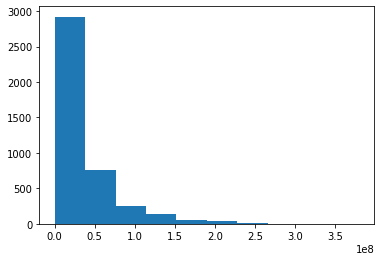

In [51]:
plt.hist(df['budget'],histtype='barstacked')

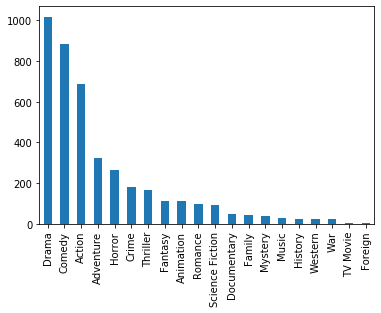

In [52]:
df['genres'].value_counts().plot.bar()

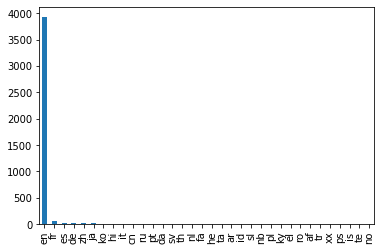

In [53]:
df['original_language'].value_counts().plot.bar()

In [54]:
#df['production_companies'].value_counts().plot.bar()

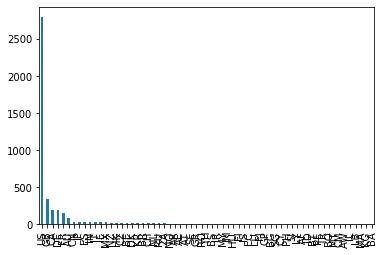

In [55]:
df['production_countries'].value_counts().plot.bar()

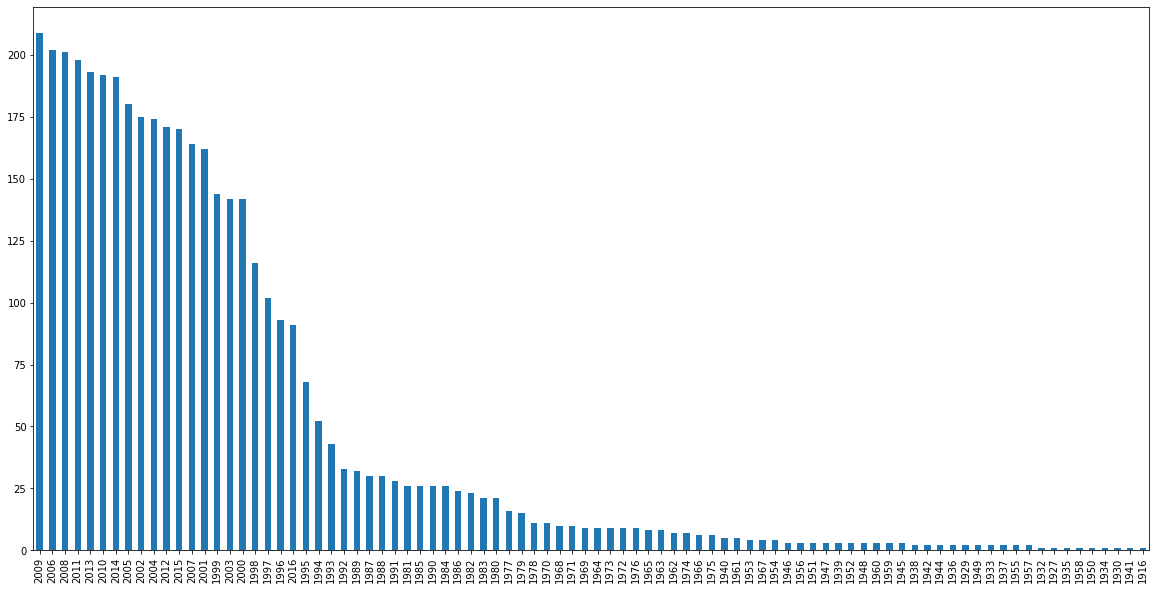

In [56]:
plt.figure(figsize=(20,10))
df['release_date'].value_counts().plot.bar()

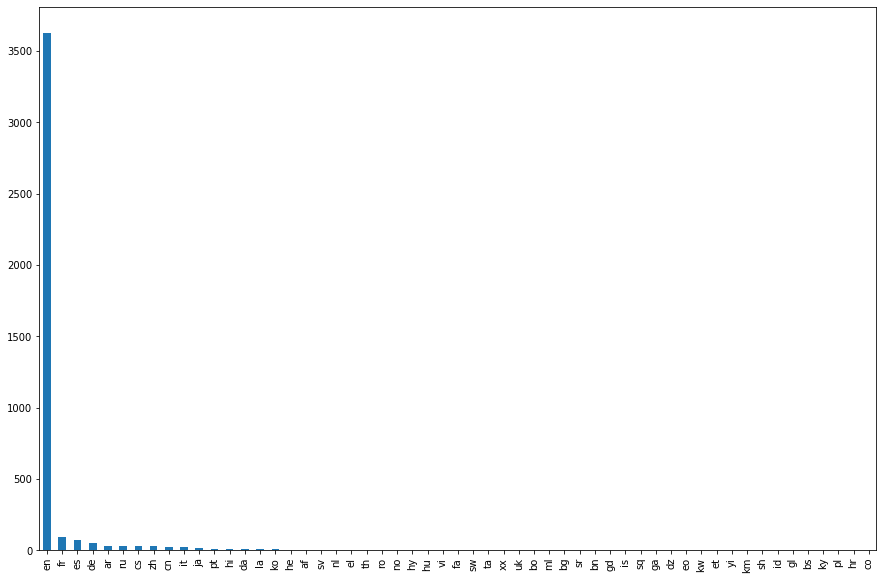

In [57]:
plt.figure(figsize=(15,10))
df['spoken_languages'].value_counts().plot.bar()

In [58]:
df['status'].value_counts()

Released    4160
Rumored        2
Name: status, dtype: int64

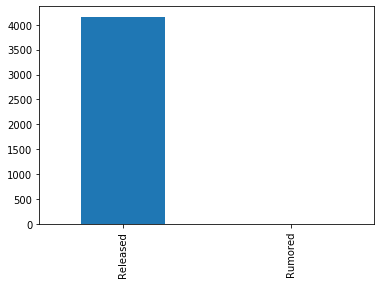

In [59]:
df['status'].value_counts().plot.bar()

## Bivarient Analysis

In [60]:
df['budget'].groupby(df['genres']).agg('sum')

genres
Action             35309902395
Adventure          21877831736
Animation           8148032353
Comedy             18618699640
Crime               4171235753
Documentary          163595145
Drama              21143931141
Family              2323877800
Fantasy             6017038831
Foreign                 225000
History              608085000
Horror              3436694269
Music                512461360
Mystery              901830000
Romance             2143880100
Science Fiction     4699882003
TV Movie               1000000
Thriller            4656170035
War                  877250000
Western              613923783
Name: budget, dtype: int64

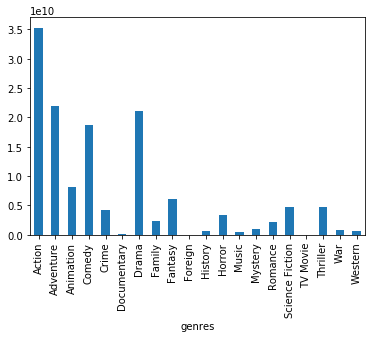

In [61]:
df['budget'].groupby(df['genres']).agg('sum').plot.bar()

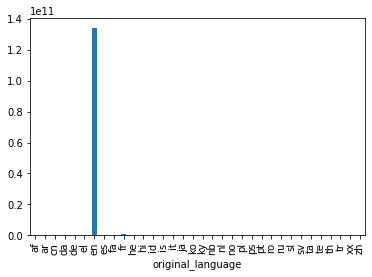

In [62]:
df['budget'].groupby(df['original_language']).agg('sum').plot.bar()

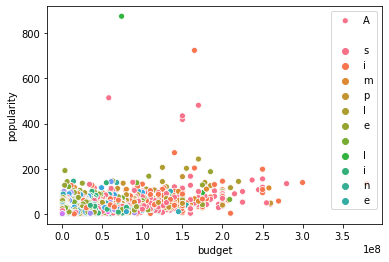

In [63]:
sns.scatterplot(df['budget'],df['popularity'],hue=df['genres'])
plt.legend('A simple line')

In [64]:
#plt.figure(figsize=(15,10))
#df['budget'].groupby(df['production_companies']).agg('sum').plot.bar()

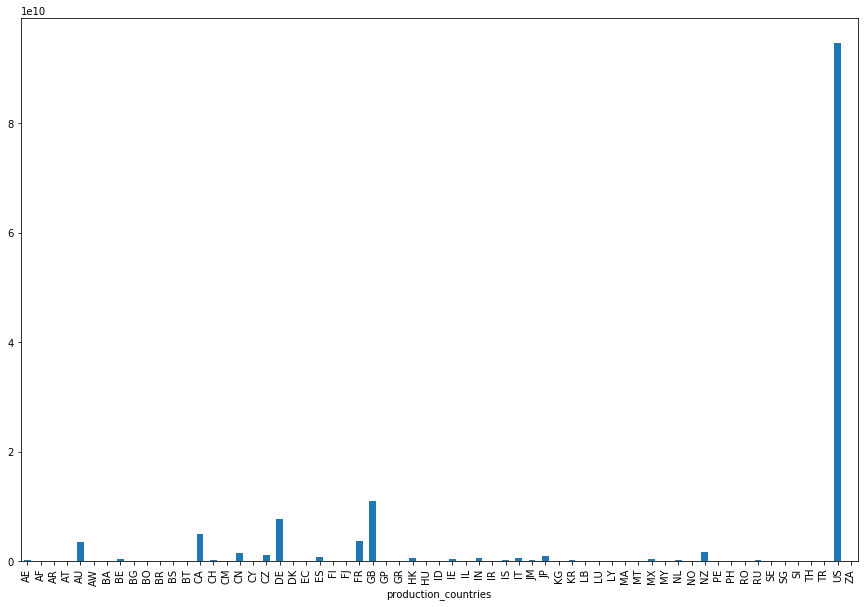

In [65]:
plt.figure(figsize=(15,10))
df['budget'].groupby(df['production_countries']).agg('sum').plot.bar()

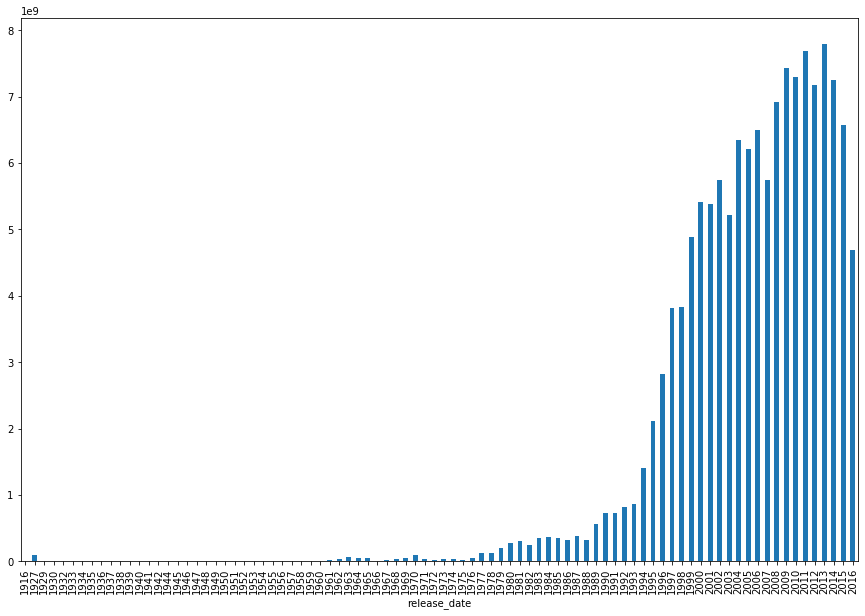

In [66]:
plt.figure(figsize=(15,10))
df['budget'].groupby(df['release_date']).agg('sum').plot.bar()

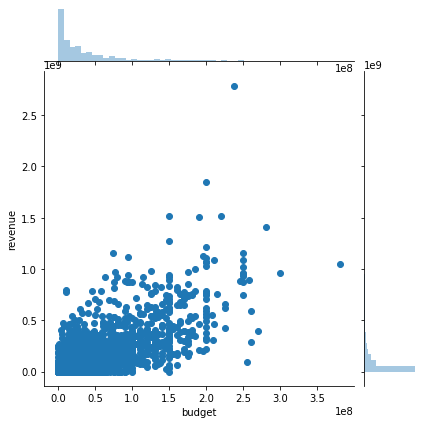

In [67]:
sns.jointplot(df['budget'],df['revenue'])

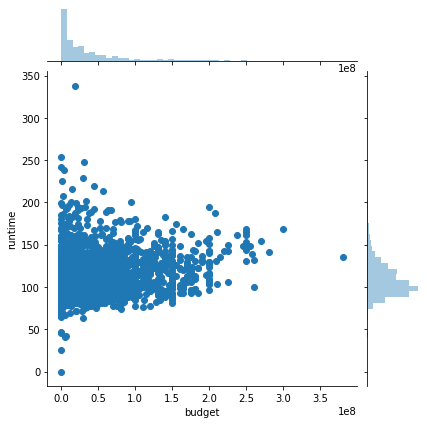

In [68]:
sns.jointplot(df['budget'],df['runtime'])

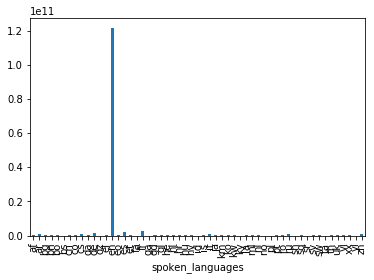

In [69]:
df['budget'].groupby(df['spoken_languages']).agg('sum').plot.bar()

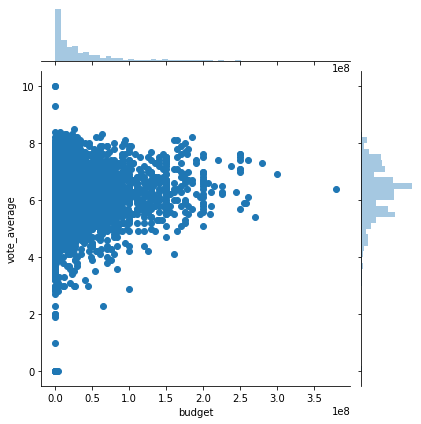

In [70]:
sns.jointplot(df['budget'],df['vote_average'])

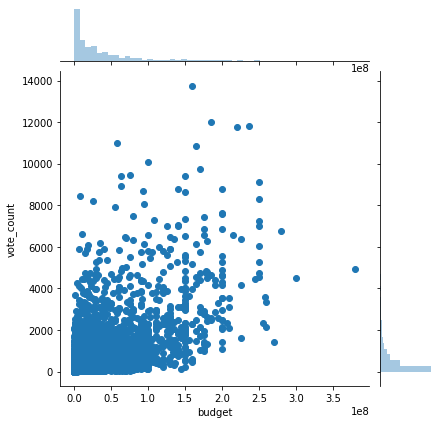

In [71]:
sns.jointplot(df['budget'],df['vote_count'])

In [72]:
df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'title', 'vote_average', 'vote_count'],
      dtype='object')

<Figure size 1080x720 with 0 Axes>

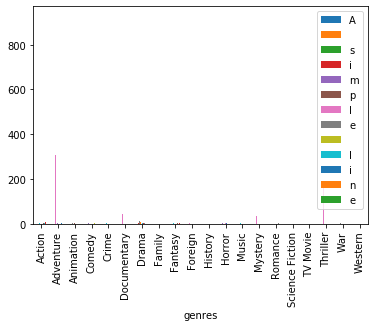

In [73]:
plt.figure(figsize=(15,10))
pd.crosstab(df['genres'],df['original_language']).plot.bar()
plt.legend('A simple line')

<Figure size 1080x720 with 0 Axes>

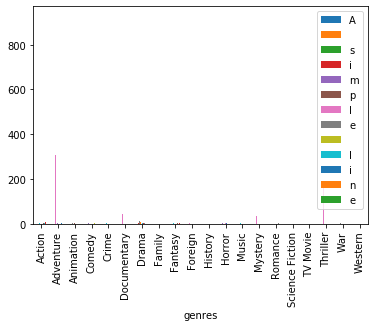

In [74]:
plt.figure(figsize=(15,10))
pd.crosstab(df['genres'],df['original_language']).plot.bar()
plt.legend('A simple line')

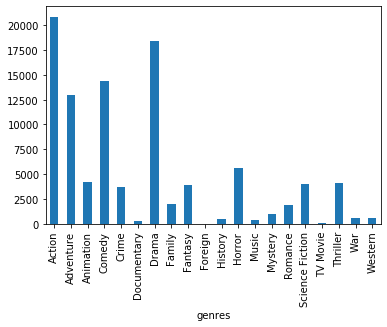

In [75]:
df['popularity'].groupby(df['genres']).agg('sum').plot.bar()

In [76]:
#pd.crosstab(df['genres'],df['production_companies']).plot.bar()

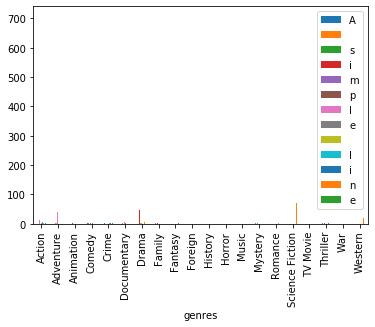

In [77]:
pd.crosstab(df['genres'],df['production_countries']).plot.bar()
plt.legend('A simple line')

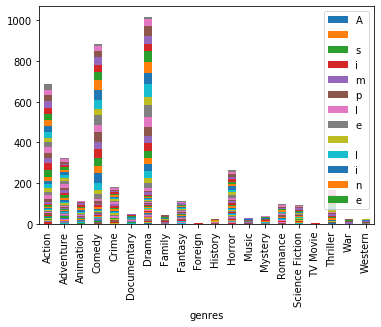

In [78]:
pd.crosstab(df['genres'],df['release_date']).plot.bar(stacked=True)
plt.legend('A simple line')

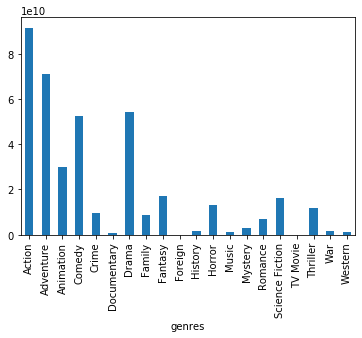

In [79]:
df['revenue'].groupby(df['genres']).agg('sum').plot.bar()

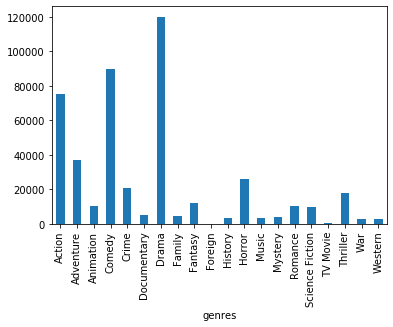

In [80]:
df['runtime'].groupby(df['genres']).agg('sum').plot.bar()

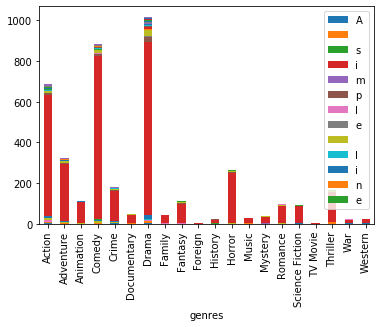

In [81]:
pd.crosstab(df['genres'],df['spoken_languages']).plot.bar(stacked=True)
plt.legend('A simple line')

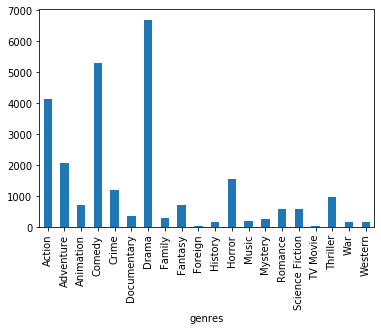

In [82]:
df['vote_average'].groupby(df['genres']).agg('sum').plot.bar()

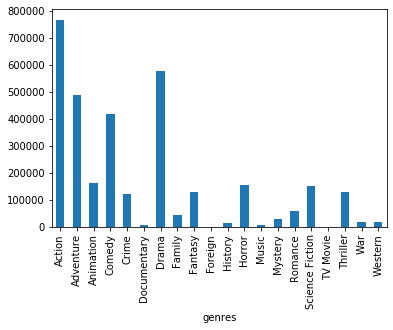

In [83]:
df['vote_count'].groupby(df['genres']).agg('sum').plot.bar()

In [84]:
df1 = df.copy()
df1.head()

,budget,genres,id,keywords,original_language,original_title,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,Action,19995,culture clash,en,Avatar,150,Ingenious Film Partners,US,2009,2787965087,162,en,Released,Avatar,7.2,11800
1,300000000,Adventure,285,ocean,en,Pirates of the Caribbean: At World's End,139,Walt Disney Pictures,US,2007,961000000,169,en,Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,Action,206647,spy,en,Spectre,107,Columbia Pictures,GB,2015,880674609,148,fr,Released,Spectre,6.3,4466
3,250000000,Action,49026,dc comics,en,The Dark Knight Rises,112,Legendary Pictures,US,2012,1084939099,165,en,Released,The Dark Knight Rises,7.6,9106
4,260000000,Action,49529,based on novel,en,John Carter,43,Walt Disney Pictures,US,2012,284139100,132,en,Released,John Carter,6.1,2124


In [85]:
df1.drop(['id','keywords','original_title','title'],axis=1,inplace=True)

In [86]:
df1.head()

,budget,genres,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,vote_average,vote_count
0,237000000,Action,en,150,Ingenious Film Partners,US,2009,2787965087,162,en,Released,7.2,11800
1,300000000,Adventure,en,139,Walt Disney Pictures,US,2007,961000000,169,en,Released,6.9,4500
2,245000000,Action,en,107,Columbia Pictures,GB,2015,880674609,148,fr,Released,6.3,4466
3,250000000,Action,en,112,Legendary Pictures,US,2012,1084939099,165,en,Released,7.6,9106
4,260000000,Action,en,43,Walt Disney Pictures,US,2012,284139100,132,en,Released,6.1,2124


In [87]:
cat_cols=['genres','original_language','production_companies','production_countries','spoken_languages','status']
df1 = pd.get_dummies(df1,drop_first=True,columns=cat_cols)

In [88]:
df1.head()

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,genres_Adventure,genres_Animation,genres_Comedy,...,spoken_languages_sv,spoken_languages_sw,spoken_languages_ta,spoken_languages_th,spoken_languages_uk,spoken_languages_vi,spoken_languages_xx,spoken_languages_yi,spoken_languages_zh,status_Rumored
0,237000000,150,2009,2787965087,162,7.2,11800,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,300000000,139,2007,961000000,169,6.9,4500,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,245000000,107,2015,880674609,148,6.3,4466,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250000000,112,2012,1084939099,165,7.6,9106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,260000000,43,2012,284139100,132,6.1,2124,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df1.shape

(4162, 1352)

## Regression - OLS

In [90]:
X = df1.drop('revenue',axis=1)
y = df1['revenue']

In [91]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4162 entries, 0 to 4802
Columns: 1352 entries, budget to status_Rumored
dtypes: float64(1), int64(6), uint8(1345)
memory usage: 5.6 MB


In [92]:
from statsmodels.api import OLS
import statsmodels.api as sm
X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant)
results = model.fit()
results.summary()

C:\Users\USER\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     7.356
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:36:58   Log-Likelihood:                -81761.
No. Observations:                4162   AIC:                         1.661e+05
Df Residuals:                    2859   BIC:                         1.744e+05
Df Model:                        1302                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================================
                                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                           1.457e+09   4.14e+08      3.519      0.000    6.45e+08    2.27e+09
budget                                                                                             1.6533      0.065     25.614      0.000       1.527       1.780
popularity                                                                                      2.998e+05   7.59e+04      3.949      0.000    1.51e+05    4.49e+05
release_date                                                                                   -8.116e+05   2.03e+05     -3.994      0.000   -1.21e+06   -4.13e+05
runtime                                                                                          1.35e+05   1.24e+05      1.093      0.275   -1.07e+05    3.77e+05
vote_average                                                                                    -6.41e+06   2.98e+06     -2.149      0.032   -1.23e+07    -5.6e+05
vote_count                                                                                      6.841e+04   2386.979     28.658      0.000    6.37e+04    7.31e+04
genres_Adventure                                                                                1.476e+07   8.11e+06      1.819      0.069   -1.15e+06    3.07e+07
genres_Animation                                                                                6.412e+07   1.32e+07      4.848      0.000    3.82e+07    9.01e+07
genres_Comedy                                                                                   2.327e+07   6.31e+06      3.688      0.000    1.09e+07    3.56e+07
genres_Crime                                                                                   -4.181e+06   1.02e+07     -0.409      0.682   -2.42e+07    1.58e+07
genres_Documentary                                                                              4.192e+07   2.45e+07      1.711      0.087   -6.11e+06    8.99e+07
genres_Drama                                                                                    7.581e+06    6.5e+06      1.166      0.244   -5.16e+06    2.03e+07
genres_Family                                                                                   7.895e+07   1.89e+07      4.173      0.000    4.19e+07    1.16e+08
genres_Fantasy                                                                                  1.277e+07   1.18e+07      1.083      0.279   -1.04e+07    3.59e+07
genres_Foreign                                                                                  4.008e+07   8.35e+07      0.480      0.631   -1.24e+0

In [93]:
#cols = list(X.columns)
#pmax = 1
#while (len(cols)>0):
#    p= []
#    model = sm.OLS(y,X_constant).fit()
#    p = pd.Series(model.pvalues,index = cols)      
#    pmax = max(p)
#    feature_with_p_max = p.idxmax()
#    if(pmax>0.05):
#        cols.remove(feature_with_p_max)
#    else:
#        break
#selected_features_BE = cols
#print(selected_features_BE)

['budget', 'popularity', 'release_date', 'vote_average', 'vote_count', 'genres_Animation', 'genres_Comedy', 'genres_Family', 'genres_Romance', 'spoken_languages_he', 'spoken_languages_hi', 'spoken_languages_hu', 'spoken_languages_ro']


In [96]:
X_fs = df1[['budget', 'popularity', 'release_date', 'vote_average', 'vote_count', 'genres_Animation', 'genres_Comedy', 'genres_Family', 'genres_Romance', 'spoken_languages_he', 'spoken_languages_hi', 'spoken_languages_hu', 'spoken_languages_ro']]
y_fs = df1['revenue']

In [97]:
from statsmodels.api import OLS
import statsmodels.api as sm
X_constant = sm.add_constant(X_fs)
model = sm.OLS(y_fs, X_constant)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     832.2
Date:                Sat, 16 Nov 2019   Prob (F-statistic):               0.00
Time:                        15:34:37   Log-Likelihood:                -82150.
No. Observations:                4162   AIC:                         1.643e+05
Df Residuals:                    4148   BIC:                         1.644e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.555e+09   2.35e+08      6.624      0.000    1.09e+09    2.02e+09
budget                  1.6594      0.043     38.930      0.000       1.576       1.743
popularity           2.616e+05   6.63e+04      3.944      0.000    1.32e+05    3.92e+05
release_date        -7.789e+05   1.16e+05     -6.710      0.000   -1.01e+06   -5.51e+05
vote_average        -3.481e+06   1.65e+06     -2.113      0.035   -6.71e+06   -2.51e+05
vote_count           6.788e+04   1899.554     35.735      0.000    6.42e+04    7.16e+04
genres_Animation     6.521e+07   8.85e+06      7.368      0.000    4.79e+07    8.26e+07
genres_Comedy        1.352e+07   3.52e+06      3.839      0.000    6.62e+06    2.04e+07
genres_Family        6.202e+07   1.37e+07      4.542      0.000    3.53e+07    8.88e+07
genres_Romance        1.65e+07   9.45e+06      1.747      0.081   -2.02e+06     3.5e+07
spoken_languages_he   1.03e+08    3.7e+07      2.785      0.005    3.05e+07    1.76e+08
spoken_languages_hi  5.271e+07   2.62e+07      2.010      0.044    1.31e+06    1.04e+08
spoken_languages_hu   8.36e+07   5.23e+07      1.598      0.110    -1.9e+07    1.86e+08
spoken_languages_ro  1.084e+08   5.23e+07      2.071      0.038    5.76e+06    2.11e+08
==============================================================================
Omnibus:                     2988.233   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           241845.877
Skew:                           2.711   Prob(JB):                         0.00
Kurtosis:                      39.949   Cond. No.                     8.94e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.94e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Classification- LOGIT

In [98]:
df2 = df1.copy()
X = df2.drop('genres')

,budget,popularity,release_date,revenue,runtime,vote_average,vote_count,genres_Adventure,genres_Animation,genres_Comedy,...,spoken_languages_sv,spoken_languages_sw,spoken_languages_ta,spoken_languages_th,spoken_languages_uk,spoken_languages_vi,spoken_languages_xx,spoken_languages_yi,spoken_languages_zh,status_Rumored
0,237000000,150,2009,2787965087,162,7.2,11800,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,300000000,139,2007,961000000,169,6.9,4500,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,245000000,107,2015,880674609,148,6.3,4466,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,250000000,112,2012,1084939099,165,7.6,9106,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,260000000,43,2012,284139100,132,6.1,2124,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from statsmodels.api import Logit
X_constant = sm.add_constant(X)
model = Logit(y,X_constant)
result = model.fit()
result.summary()